## Exploring Linear Regression

### Features of dataset :

- Height of father in inches
- Height of son in inches

**Given the height of the father we need to predict the height of the son*

## Import required libraries

In [75]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import shutil
import matplotlib as mpl

from matplotlib import pyplot as plt

## Import dataset

In [32]:
FEATURES = ['father_height']
TARGET = 'son_height'

columns = list([TARGET])
columns.extend(FEATURES)

df_train = pd.read_csv('csv/height_train.csv', header = None, names = columns)
df_eval = pd.read_csv('csv/height_eval.csv', header = None, names = columns)
df_test = pd.read_csv('csv/height_test.csv', header = None, names = columns)

print(df_train.head())

   son_height  father_height
0       73.46          77.31
1       58.24          75.56
2       68.56          73.94
3       65.30          67.10
4       75.41          55.98


## Preparing the data and training the model

In [33]:
def make_input_fn(df, num_epochs):
	return tf.estimator.inputs.pandas_input_fn(
		x = df,
		y = df[TARGET],
		batch_size = 512,
		num_epochs = num_epochs,
		shuffle = True,
		queue_capacity = 1000,
		num_threads = 1
	)

def make_prediction_input_fn(df, num_epochs):
	return tf.estimator.inputs.pandas_input_fn(
		x = df,
		y = None,
		batch_size = 512,
		num_epochs = num_epochs,
		shuffle = True,
		queue_capacity = 1000,
		num_threads = 1
	)

def make_feature_cols():
	input_columns = [tf.feature_column.numeric_column(k) for k in FEATURES]
	return input_columns

tf.logging.set_verbosity(tf.logging.INFO)

OUTDIR = './pandas/linear/height_analysis'
shutil.rmtree(OUTDIR, ignore_errors = True)

model = tf.estimator.LinearRegressor(
	feature_columns = make_feature_cols(), model_dir = OUTDIR)

model.train(input_fn = make_input_fn(df_train, num_epochs = 1))

def print_rmse(model, name, df):
	metrics = model.evaluate(input_fn = make_input_fn(df, num_epochs = 1))
	print('RMSE on {} dataset = {}'.format(name, np.sqrt(metrics['average_loss'])))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './pandas/linear/height_analysis', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f549e124b70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ./pandas/linear/height

INFO:tensorflow:loss = 41284.34, step = 7301 (0.404 sec)
INFO:tensorflow:global_step/sec: 249.318
INFO:tensorflow:loss = 48031.816, step = 7401 (0.403 sec)
INFO:tensorflow:global_step/sec: 214.464
INFO:tensorflow:loss = 50215.34, step = 7501 (0.465 sec)
INFO:tensorflow:global_step/sec: 238.579
INFO:tensorflow:loss = 47868.613, step = 7601 (0.418 sec)
INFO:tensorflow:global_step/sec: 236.173
INFO:tensorflow:loss = 43075.234, step = 7701 (0.426 sec)
INFO:tensorflow:global_step/sec: 229.44
INFO:tensorflow:loss = 48716.33, step = 7801 (0.434 sec)
INFO:tensorflow:global_step/sec: 225.313
INFO:tensorflow:loss = 47449.67, step = 7901 (0.448 sec)
INFO:tensorflow:global_step/sec: 217.425
INFO:tensorflow:loss = 44986.625, step = 8001 (0.456 sec)
INFO:tensorflow:global_step/sec: 243.692
INFO:tensorflow:loss = 42248.793, step = 8101 (0.411 sec)
INFO:tensorflow:global_step/sec: 252.121
INFO:tensorflow:loss = 44693.22, step = 8201 (0.396 sec)
INFO:tensorflow:global_step/sec: 247.852
INFO:tensorflow:

## Testing of model

In [95]:
print_rmse(model, 'validation', df_eval)

predictions = model.predict(input_fn = make_prediction_input_fn(df_test, 1))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-17-17:10:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./pandas/linear/height_analysis/model.ckpt-13676
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-17-17:10:39
INFO:tensorflow:Saving dict for global step 13676: average_loss = 84.812065, global_step = 13676, label/mean = 67.50112, loss = 43418.695, prediction/mean = 66.81424
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 13676: ./pandas/linear/height_analysis/model.ckpt-13676
RMSE on validation dataset = 9.209346771240234


## Plotting the best fit line

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./pandas/linear/height_analysis/model.ckpt-13676
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
999174
999174
999174


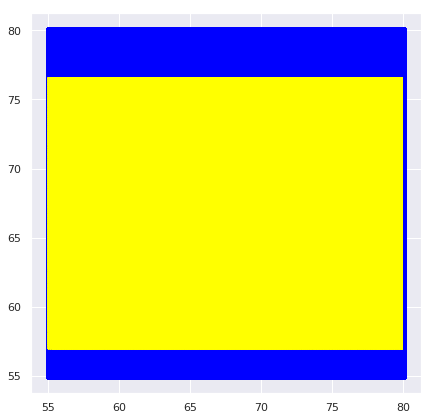

In [96]:
test_x = df_test['father_height'].values[:, np.newaxis]
test_y = df_test['son_height'].values
prediction_y = np.array([item['predictions'][0] for item in predictions])

print(len(test_x))
print(len(test_y))
print(len(prediction_y))


mpl.rcParams['agg.path.chunksize'] = 10000
plt.scatter(df_train['father_height'], df_train['son_height'], color = 'blue')
plt.plot(test_x, prediction_y, color = 'yellow')
plt.show()